<a href="https://colab.research.google.com/github/DeisyData/BIT_IA_Bootcamp/blob/main/S5_C1_DecisionTree_Lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Árbol de Decisión - Evaluación del riesgo de ataque cardíaco

In [ ]:
## Importar las librerías necesarias
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score


data = {
    'Age': [16, 17, 20, 25, 35, 40, 45, 50, 22, 28, 30, 33, 38, 42, 46, 52, 18, 26, 55, 60],
    'Weight': [55, 65, 70, 80, 68, 85, 72, 90, 60, 78, 74, 82, 77, 88, 75, 92, 68, 83, 95, 100],
    'Smoker': [0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1],  # 0 = No fumador, 1 = Fumador
    'Risk': [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]  # 0 = Bajo riesgo, 1 = Alto riesgo
}

# Convertir el dataset a un DataFrame de pandas
df = pd.DataFrame(data)

# Mostrar los datos
print("Datos del dataset:")
print(df)

Datos del dataset:
    Age  Weight  Smoker  Risk
0    16      55       0     0
1    17      65       0     1
2    20      70       0     0
3    25      80       1     1
4    35      68       0     0
5    40      85       1     1
6    45      72       0     0
7    50      90       1     1
8    22      60       0     0
9    28      78       1     1
10   30      74       0     0
11   33      82       1     1
12   38      77       0     0
13   42      88       1     1
14   46      75       0     0
15   52      92       1     1
16   18      68       0     0
17   26      83       1     1
18   55      95       0     0
19   60     100       1     1


In [ ]:
df['Age'].sort_values()

,Age
0,16
1,17
16,18
2,20
8,22
3,25
17,26
9,28
10,30
11,33


**Q1** ¿A qué decision podríamos llegar con estos datos?
Para el sector una herramienta de APOYO  al diagnóstico de riesgo de Infarto
Para predecir el nivel riesgo en alto o bajo

**Q2** ¿Que tipo de problema debemos abordar?
Es un problema de CLASIFICACIÓN tARGET =  RISK

# Actividad 1. Separar las características (X) de la variable objetivo (y)

* Cuál es la variable objetivo?
* Cuáles son los atributos?


In [ ]:
Y = df['Risk']
X = df.drop('Risk', axis=1)

# Actividad 2. Dividir los datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=30)

# Actividad 3. Seleccione y ajuste el modelo: árbol de decision

* Ejecute lás líneas de código, si desea cambie el nombre del modelo



In [ ]:
# Crear el modelo de árbol de decisión
modeloDTC = DecisionTreeClassifier()

# Entrenar el modelo
modeloDTC.fit(X_train, y_train)

DecisionTreeClassifier()

# Actividad 4. Hacer predicciones sobre los datos de prueba

* Aplique al modelo la palabra predict y evalue en los datos de prueba y guardelos en y_pred


```
modelo.predict(datos_de_prueba)
```



In [ ]:
y_pred = modeloDTC.predict(X_test) # Hace predicciones
y_test_array = y_test.to_numpy()


In [ ]:
X_test

,Age,Weight,Smoker
11,33,82,1
0,16,55,0
15,52,92,1
14,46,75,0


In [ ]:
y_test

,Risk
11,1
0,0
15,1
14,0


# Actividad 5. Evalue el modelo

* Use la medida de accuracy para medir el desempeño del modelo

```
accuracy_score(y_test, y_pred)
```
* Genere un reporte de medidas del modelo con

```
classification_report(y_test, y_pred)
```


* Imprima las mediciones y acopmpañe de valores que orienten al usuario

In [ ]:
print(f"Etiquetas Reales {y_test_array}")
print(f"Etiquetas Predichas {y_pred}")
print(f"Presicion del modelo: {accuracy_score(y_test, y_pred)*100} %")

print("Reporte de Clasification")
target_names = ['Bajo Riesgo (0)', 'Alto Riesgo (1)']

print(classification_report(y_test, y_pred,  target_names = target_names))
report = classification_report(y_test, y_pred)

Etiquetas Reales [1 0 1 0]
Etiquetas Predichas [1 1 1 0]
Presicion del modelo: 75.0 %
Reporte de Clasification
                 precision    recall  f1-score   support

Bajo Riesgo (0)       1.00      0.50      0.67         2
Alto Riesgo (1)       0.67      1.00      0.80         2

       accuracy                           0.75         4
      macro avg       0.83      0.75      0.73         4
   weighted avg       0.83      0.75      0.73         4



# Actividad 6. Visualizar el árbol de decisión



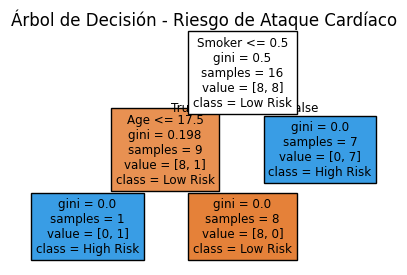

In [ ]:
plt.figure(figsize=(5,3))
tree.plot_tree(modeloDTC, feature_names=['Age', 'Weight', 'Smoker'], class_names=['Low Risk', 'High Risk'], filled=True)
plt.title("Árbol de Decisión - Riesgo de Ataque Cardíaco")
plt.show()

# Actividad 7. Ejemplo de predicción

* Escriba un código para evaluar un dato del modelo

* Use estos comentarios que orienten al usuario



```
print("\nPredicción con un ejemplo nuevo:")
print(f"Predicción (0 = Bajo Riesgo, 1 = Alto Riesgo): {prediction[0]}")

```



In [ ]:
df['Weight'].sort_values()

,Weight
0,55
8,60
1,65
16,68
4,68
2,70
6,72
10,74
14,75
12,77


In [ ]:
example = [[15, 60, 1]] # Ejemplo: 27 años, 72 kg, No fumador
# Ejemplo: 31 años, 95 kg, No fumador

prediccion= modeloDTC.predict(example)

if prediccion[0] == 0:
  print("El paciente tiene un riesgo bajo")
else:
  print("El paciente tiene un riesgo alto")

El paciente tiene un riesgo alto


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# Parte 2. Cambiar el tamaño del dataset

* Use el archivo >> DataSet/Classification/Health/heart_attack_risk_dataset.csv

* Ejecute nuevamente y analise los resultados

# Parte 3. Leer los parámetros del modelo entrendo ( árbol aprendido)

* get_depth()
* get_n_leaves()
* apply(X)

In [ ]:
model_CART_20 = modeloDTC

In [ ]:
get_depth = model_CART_20.get_depth()
print(f"El árbol tiene una profundidad  de {get_depth}")

El árbol tiene una profundidad  de 2


In [ ]:
get_leaves = model_CART_20.get_n_leaves()
print(f"El árbol tiene {get_leaves} hojas")

El árbol tiene 3 hojas


In [ ]:
# Nodos terminal
leaf_indices = model_CART_20.apply(X_test)
print(leaf_indices)

[4 2 4 3]


In [ ]:
X_test

,Age,Weight,Smoker
11,33,82,1
0,16,55,0
15,52,92,1
14,46,75,0


In [ ]:
get_params = model_CART_20.get_params()
print(get_params)

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': None, 'splitter': 'best'}


In [ ]:
predict_proba = model_CART_20.predict_proba(X_test)
print(predict_proba)

[[0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]]


In [ ]:
y_test

,Risk
11,1
0,0
15,1
14,0


In [ ]:
from sklearn.model_selection import GridSearchCV

# Selección de los parámetros
params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [ 3, 4],
    'min_samples_split': [2, 5, 10]
}

model = DecisionTreeClassifier()
validator = GridSearchCV(model, params, cv=3)
validator.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [3, 4],
                         'min_samples_split': [2, 5, 10]})

In [ ]:
params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 3, 4, 5],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3]
}

model = DecisionTreeClassifier()
validator = GridSearchCV(model, params, cv=3)
validator.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4]})

In [ ]:
colums = ['params', 'mean_test_score', 'rank_test_score']
results = pd.DataFrame(validator.cv_results_)[colums]
results.sort_values(by='rank_test_score')

,params,mean_test_score,rank_test_score
71,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.944444,1
42,"{'criterion': 'entropy', 'max_depth': 2, 'min_...",0.944444,1
43,"{'criterion': 'entropy', 'max_depth': 2, 'min_...",0.944444,1
44,"{'criterion': 'entropy', 'max_depth': 2, 'min_...",0.944444,1
33,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.944444,1
...,...,...,...
28,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.811111,59
46,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",0.811111,59
36,"{'criterion': 'entropy', 'max_depth': 2, 'min_...",0.811111,59
10,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.811111,59


In [ ]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   params           72 non-null     object 
 1   mean_test_score  72 non-null     float64
 2   rank_test_score  72 non-null     int32  
dtypes: float64(1), int32(1), object(1)
memory usage: 1.5+ KB


# Parte 4. Modificando los parámetros del árbol

 Diseñar experimentos de entrenamiento

* max_depth
* min_samples_split
* min_samples_leaf

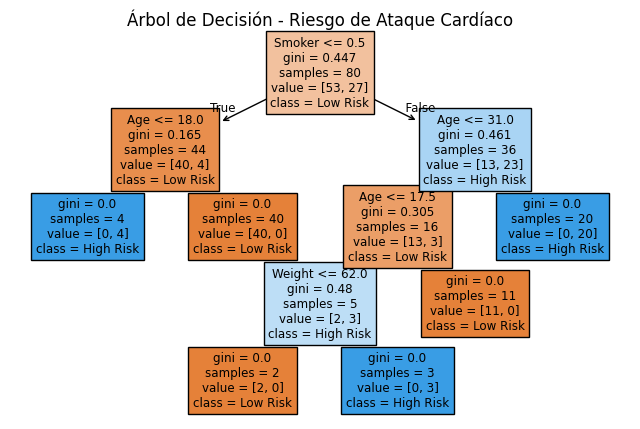

Presicion del modelo: 95.0 %
El árbol tiene una profundidad  de 4
El árbol tiene 6 hojas
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 7, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': None, 'splitter': 'best'}


In [ ]:
# Convertir el dataset a un DataFrame de pandas
df = pd.DataFrame(data)

# Convertir el dataset a un DataFrame de pandas
df = pd.read_csv('/content/heart_attack_risk_dataset.csv')


# Separar las características (X) de la variable objetivo (y)
X = df[['Age', 'Weight', 'Smoker']]  # Características (Edad, Peso, Fumador)
y = df['Risk']  # Etiqueta (Riesgo)

# Dividir los datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Datos

# Crear el modelo de árbol de decisión CON ENTROPIA Y PODA
model_C45 = DecisionTreeClassifier(criterion="gini", max_depth = 7) #  min_samples_split= 17 número mínimo de muestras en un nodo
# Experimento 1: gini
# Experimento 2: entropy, maxdepth = 3
# Experimento 3: entropy, max_depth = 4, min_impurity_decrease= 0.5
# Experimento 4: entropy, max_depth = 4, min_impurity_decrease= 0.2

# Entrenar el modelo fit
model_C45.fit(X_train, y_train)
# Hace predicciones
y_pred = model_C45.predict(X_test)
# Visualizacion del arbol
y_test_array = y_test.to_numpy()
plt.figure(figsize=(8,5))
tree.plot_tree(model_C45, feature_names=['Age', 'Weight', 'Smoker'], class_names=['Low Risk', 'High Risk'], filled=True)
plt.title("Árbol de Decisión - Riesgo de Ataque Cardíaco")
plt.show()

#Medición de Desempeño
print(f"Presicion del modelo: {accuracy_score(y_test, y_pred)*100} %")
# Consulta de parámetros
get_depth = model_C45.get_depth()
print(f"El árbol tiene una profundidad  de {get_depth}")
get_leaves = model_C45.get_n_leaves()
print(f"El árbol tiene {get_leaves} hojas")
get_params = model_C45.get_params()
print(get_params)

# Parte 5. Validación cruzada

Generar las posibles combinaciones de los parámtros del modelo (árbol)

In [ ]:
from sklearn.model_selection import GridSearchCV

# Selección de los parámetros
params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [ 3, 4],
    'min_samples_split': [2, 5, 10]
}

model = DecisionTreeClassifier()
validator = GridSearchCV(model, params, scoring = 'accuracy', cv=3)

validator.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [3, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [ ]:
import time

In [ ]:
start_time = time.time()
validator.fit(X_train, y_train)
# Punto de fin
end_time = time.time()
# Calcular la duración en segundos
execution_time = end_time - start_time
execution_time

0.3751564025878906

In [ ]:
colums = ['param_criterion',	'param_max_depth',	'param_min_samples_split', 'mean_test_score', 'rank_test_score']
# rank_test_score es el ranking del puntaje obtenido en conjunto de parametros del experimento x
results = pd.DataFrame(validator.cv_results_)[colums]
results.sort_values(by='rank_test_score')

,param_criterion,param_max_depth,param_min_samples_split,mean_test_score,rank_test_score
3,gini,4,2,0.962488,1
9,entropy,4,2,0.962488,1
0,gini,3,2,0.949668,3
1,gini,3,5,0.949668,3
2,gini,3,10,0.949668,3
4,gini,4,5,0.949668,3
5,gini,4,10,0.949668,3
6,entropy,3,2,0.949668,3
7,entropy,3,5,0.949668,3
8,entropy,3,10,0.949668,3
